In [1]:
import pandas as pd
import numpy as np

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Step 1: Load Dataset
# ------------------------------
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Head:\n", df.head())
print("\nDataset Info:")
print(df.info())

Dataset Head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non

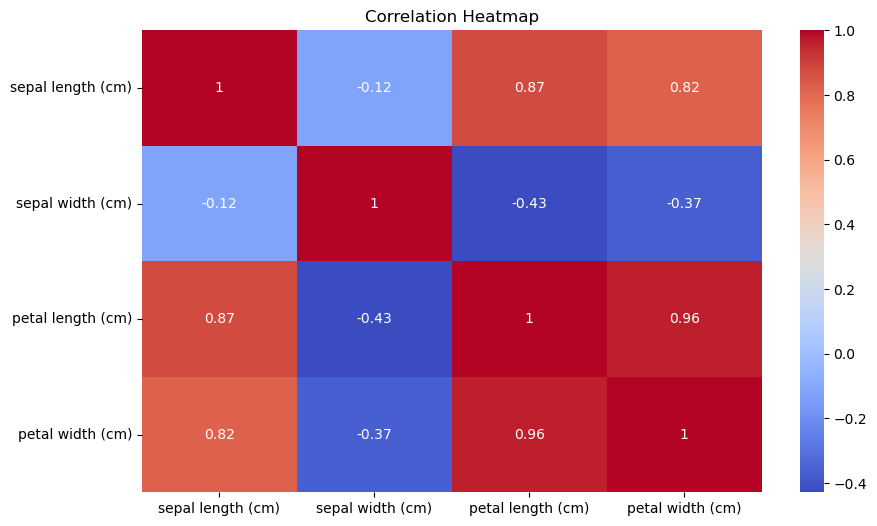

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

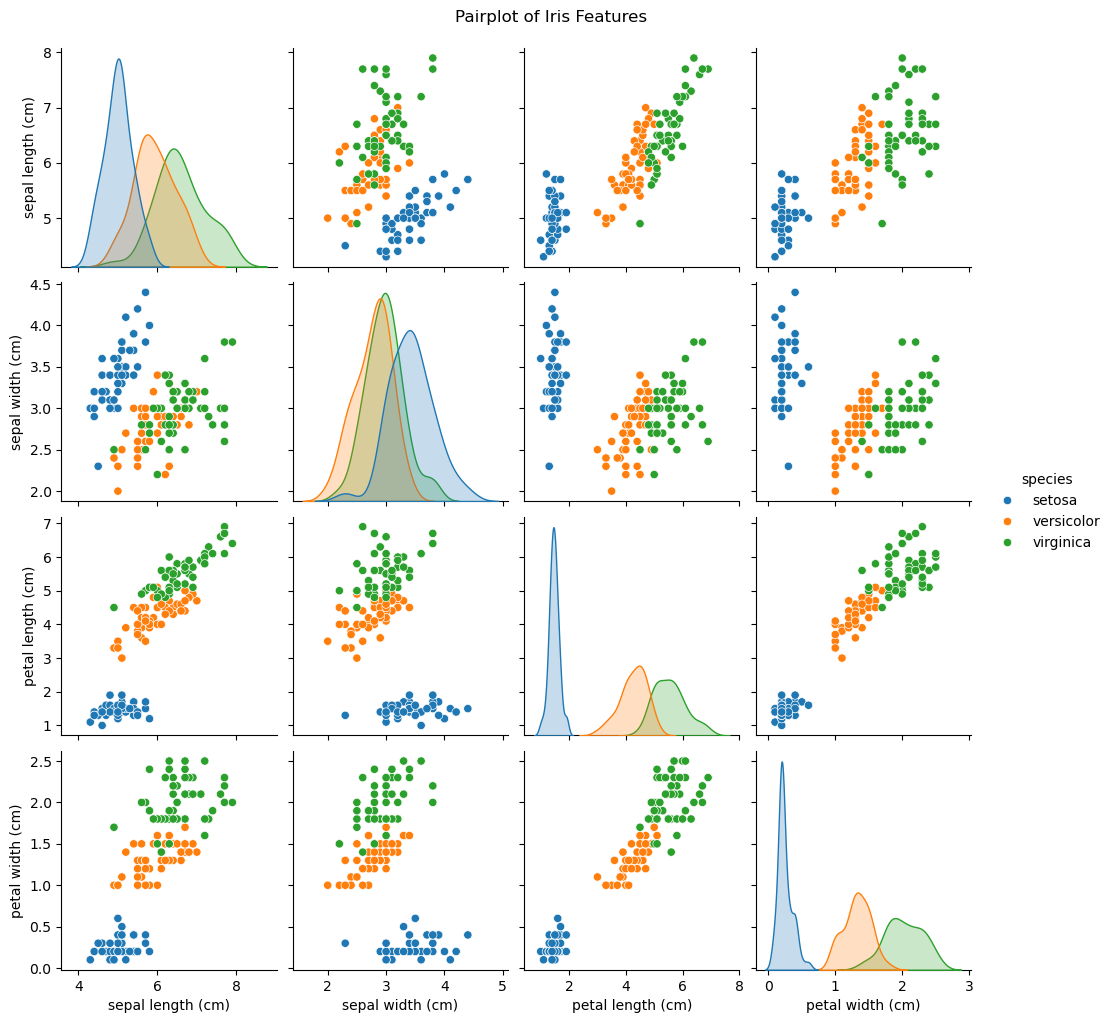

In [7]:
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()




In [9]:
X = df.drop(columns=['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "CV Mean Accuracy": np.mean(cv_scores),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, zero_division=0)
    }


Model: Logistic Regression
Cross-Validation Accuracy: 0.9733
Test Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



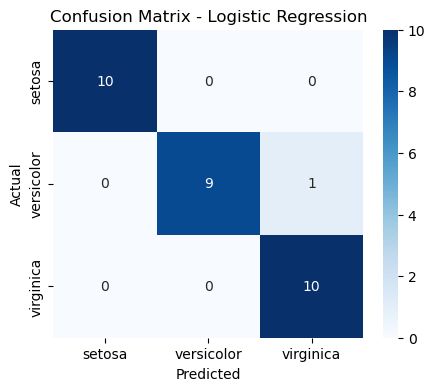


Model: Decision Tree
Cross-Validation Accuracy: 0.9533
Test Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



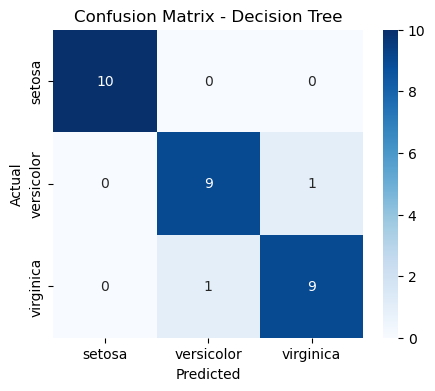


Model: Random Forest
Cross-Validation Accuracy: 0.9667
Test Accuracy: 0.9000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



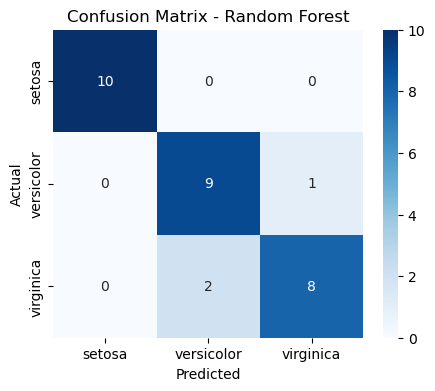

In [11]:
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Cross-Validation Accuracy: {metrics['CV Mean Accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print("Classification Report:\n", metrics["Classification Report"])

    # Confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, models[name].predict(X_test)),
                annot=True, fmt="d", cmap="Blues",
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [12]:
best_model = models["Random Forest"]


## Export the model

In [13]:
import pickle

pickle.dump(best_model,open('iris_model.pkl','wb'))
